## Preamble

In [9]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import sys
sys.path.append('..')
from utils import get_sample_locations, get_sample_params_from_subdiv

img = Image.open('../data/tiny-imagenet-200-fisheye/test/images/test_0.JPEG')
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']

## Tests

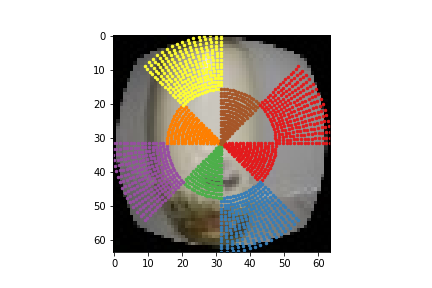

In [12]:
# Sampling parameters
alpha = np.pi/4
# dmin = 16
ds = 16
n_azimuth = 16
n_radius = 16
radius_buffer = 0
azimuth_buffer = 0

plt.figure()
plt.imshow(img)

# Get sample locations
for i in range(8):
    phi = i*np.pi/4
    dmin = i % 2 * 16
    sample_points = get_sample_locations(alpha, phi, dmin, ds, n_azimuth, n_radius, img.size, radius_buffer=radius_buffer, azimuth_buffer=azimuth_buffer)
    plt.scatter(*zip(*sample_points), color=colors[i%len(colors)], s=6)

plt.show()

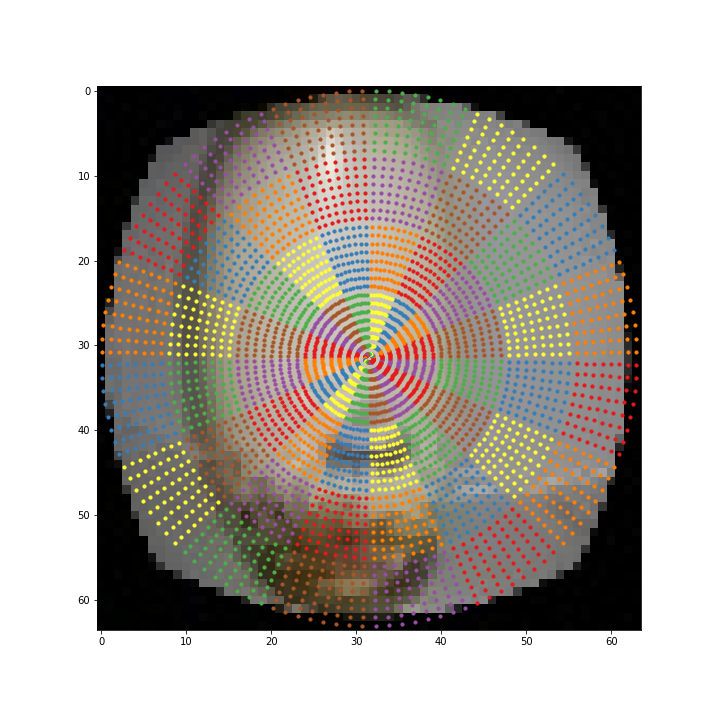

In [11]:
subdivs = 3
img_size = img.size
n_radius = n_azimuth = 8
radius_buffer = img_size[0] / (n_radius * (2**(subdivs-1)) * 2 * 2)
azimuth_buffer = 2*np.pi / (n_azimuth * (2**(subdivs+1)) * 2)

plt.figure(figsize=(10,10))
plt.imshow(img)

sampling_params = get_sample_params_from_subdiv(subdivs, n_radius, n_azimuth, img_size, radius_buffer, azimuth_buffer)
for i in range(len(sampling_params)):
    plt.scatter(*zip(*get_sample_locations(**sampling_params[i])), s=10, color=colors[i%len(colors)])

plt.show()